This notebook will introduce you to SkLearn, and will go over how we can build a Support Vector Machine using one of Python's many libraries. The dataset provided from this homework is a subset of the MNIST dataset, which is an extremely large dataset consisting of handwritten digits. The task of this notebook is to build a support vector machine (SVM) to take the inputs which represents the pixels of each image, and correctly guess the value being written. 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Example of handwritten digits from the MNIST database

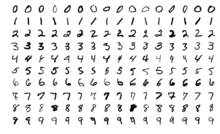

First load the libraries. Feel free to add more if you desire to use others

In [68]:
import numpy as np
import pandas as pd
!pip install ipython-autotime
%load_ext autotime

time: 141 µs (started: 2021-04-21 15:57:36 +00:00)


**Task 1 (10 points):** Load the dataset "digitsData.csv" (not digits_data.csv) into a dataframe using Pandas. Then we are going to filter our data to represent the inputs and the outputs. The outputs, which will represent our y values, will be the first column, this is the value of the handwritten digit. The inputs, the x values, will be all other columns, which represent each pixel of the image. Create two arrays that we will use to train our dataset, one being the x values, and the other being the y values (digit values). Might be helpful to inspect the dataframe after loading the csv, in order to understand the structure.

In [57]:
#Load the dataset, and filter your data to the inputs and outputs (x and y columns)
data = pd.read_csv('/content/drive/My Drive/digitsData.csv')
y = data[['label']].to_numpy() # value of a digit
x = data.iloc[0:,1:].to_numpy() # x values of a digit

We are now going to split our data into training and testing data to build our Support Vector Machine. train_test_split is a method from SkLearn that does just this, the parameters are the input data, the output data, and the parameter test_size represents the percentage of the dataset we want to be testing data. Training data is almost always greater than the size of testing data, in order to build the model and have it run efficiently on the testing data.

Note: x_data and y_data are placeholders, it represents the input and output data, change the names to whatever you called yours.

**Task 2 (35 points): Filling out the table**

In [93]:
from sklearn.model_selection import train_test_split
# use the table to enter the value for the variable below, represents proportion that will be the test set
test_proportion = 0.25
# x_data and y_data represents the inputs and outputs you should have created above, 
# feel free to change name if you assigned different variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_proportion)


time: 215 ms (started: 2021-04-21 16:21:59 +00:00)


Now you are going to build, train, and test a support vector machine. Please use the references we provided for help, but the only parameter that will change will be "kernel." Keep all of the other parameters their default values. After you create your support vector machine, you are going to train it using your...training data, and make predictions on the testing data. These predictions will be the digit the SVM guesses is handwritten given it's inputs, which has been build and trained on the training data. After the SVM is run on the testing data, find the accuracy of how good an indicator the SVM was at evaluating handwritten digits, and find the number of support vectors for each row in the table you are asked to fill out.

Helpful Tools:

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Hint: For finding the number of support vectors, remember you can find the sum of values in an array

In [83]:
from sklearn import svm
from sklearn import metrics

time: 1.02 ms (started: 2021-04-21 16:15:38 +00:00)


In [94]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time: 1min 16s (started: 2021-04-21 16:22:03 +00:00)


In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Total number of support vectors: ", sum(clf.n_support_))

Accuracy: 0.9712
Total number of support vectors:  4986
time: 9.11 ms (started: 2021-04-21 16:23:39 +00:00)


**Task 3 (15 points): Creating a Confusion Matrix**

A confusion matrix is a table like plot that visualizing how accurate a supervised learning model is. It compares the actual values compared to the values predicted by the model. When creating the confusion matrix here, remember that we tested our model on the test data, so that we should plot our confusion matrix based upon how well our SVM performed on the testing data.

Hint: if in your plot some of your values are in terms of exponents, add another parameter to the function called "values_format" and set it equal to '.0f'

Helpful Tool: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

Confusion matrix, without normalization
[[446   0   2   0   2   1   1   0   0   0]
 [  0 585   2   2   2   0   0   0   1   0]
 [  0   1 449   1   3   0   1   4   4   1]
 [  0   1   5 511   0   5   2   3   7   1]
 [  0   0   2   0 487   0   2   1   0   8]
 [  2   0   0   5   0 449   5   0   0   1]
 [  2   0   3   0   3   1 480   0   0   0]
 [  0   2   3   0   5   0   0 530   1   6]
 [  1   3   3   3   3   2   0   0 421   3]
 [  2   0   1   3  10   0   0   3   3 498]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.97 0.   0.01 0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.01 0.96 0.   0.01 0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.02]
 [0.   0.   0.   0.01 0.   0.97 0.01 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.   0.98 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.01 0.   0.   0.97 0.   0.01]
 [0.   0.01 0.01 0.01 0.01 0.   0.   0.   0.96 0.01]
 [0.   0.   0.   0.01 0.

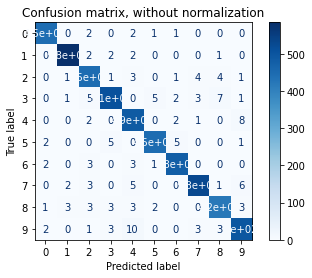

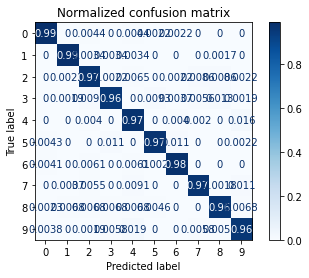

time: 52.2 s (started: 2021-04-21 16:28:06 +00:00)


In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()